# Linear Regression with Multiple Variables (多变量线性回归)

## Multiple Features

Linear regression with multiple variables is also know as *"multivariate linear regression."*

We now introduce notation for equations where we can have any number of input variables.

$
\begin{align*}
x_j^{(i)} &= \text{value of feature } j \text{ in the } i^{th} \text{ traing example } \\
x^{(i)} &= \text{the column vector of all the feature inputs of the } i^{th} \text{ training example} \\
m &= \text{the number of training examples} \\
n &= \left| x^{(i)} \right| \; \text{(the number of features)}
\end{align*}
$

Now define the multivariables form of the hypothesis function as follows, accomodating these features:

$
h_\theta (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n
$

Using the definition of matrix multiplication, our multivariate hypothesis function can be concisely represented as:

$
h_\theta(x) =
\begin{bmatrix}
\theta_0 & \theta_1 & \cdots & \theta_n
\end{bmatrix}
\begin{bmatrix}
x_0 \\ x_1 \\ \vdots \\ x_n
\end{bmatrix}
= \theta^T x \qquad \text{where } x_0 = 1
$

This is a vectorization of out hypothesis for one training example.

Now we can collect all $m$ training examples each with $n$ features and record them in an $n+1$ by $m$ matrix. In this matrix we let the value of the subscript (feature) also represent the row number (except the initial row is the "zeroth" row), and the value of the superscript (the training example) also represent the column number, as shown here:

$
X = 
\begin{bmatrix}
x_0^{(1)} & x_0^{(2)} & \cdots & x_0^{(m)} \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\vdots \\
x_n^{(1)} & x_n^{(2)} & \cdots & x_n^{(m)}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\vdots \\
x_n^{(1)} & x_n^{(2)} & \cdots & x_n^{(m)}
\end{bmatrix}
$

Notice above that the $ith$ column is the $ith$ training example (like the vector above).

Now we can define $h_\theta(X)$ as a row vector that gives the value of $h_\theta(x)$ at each of the$m$ training examples, and using the definition of matrix multiplication, we represent this as below:

$
h_\theta(X) =
\begin{bmatrix}
\theta_0 & \theta_1 & \cdots & \theta_n
\end{bmatrix}
\begin{bmatrix}
x_0^{(1)} & x_0^{(2)} & \cdots & x_0^{(m)} \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\vdots \\
x_n^{(1)} & x_n^{(2)} & \cdots & x_n^{(m)}
\end{bmatrix}
= \theta^T X
$

However, this version of hypothesis function assumes that matrix $X$ stores trainging examples column-wise and $\theta$ is a column vector. **But for the rest of this page, and other pages, $X$ will represent a matrix of training examples $x^{(i)}$ stored row-size,** in which case, $h_\theta(X)$ is would be a column vector, not a row vector, and you would calculate the hypothesis function with:

$
h_\theta(X) = X \theta
$

**Example:**

<img src="./images/2/Multiple_features.png" align=left width=49% />
<img src="./images/2/Hypothesis.png" align=right width=49% />

## Cost function

For the parameter vector $\theta$ (of type $\mathbb{R}^{n+1}$ or in $\mathbb{R}^{(n+1)\ times1 }$), the cost function is:

$
J(\theta) = \dfrac{1}{2m} \displaystyle \sum_{i=1}^m \left(h_\theta(x^{(i)} - y^{(i)} \right)^2
$

The vectorized version is:

$
J(\theta) = \dfrac{1}{2m} (X \theta - \vec{y})^T (X \theta - \vec{y})
$

With Octave, you can use `sumsq` or `z'*z` to compute the cost function.

In [1]:
X = [2104 5 1 45;
     1416 3 2 40;
     1534 3 2 30
     852 2 1 36];
X = [ones(4, 1) X]
y = [460;
     232;
     315;
     178];
theta = zeros(size(X, 2),1);
m = length(y);
X, y, theta, m

X =

      1   2104      5      1     45
      1   1416      3      2     40
      1   1534      3      2     30
      1    852      2      1     36

y =

   460
   232
   315
   178

theta =

   0
   0
   0
   0
   0

m =  4


In [2]:
J = sumsq(X * theta - y) / (2 * m)

J =    4.9542e+04


In [3]:
J = (X * theta - y)' * (X * theta - y) / (2 * m)

J =    4.9542e+04


## Gradient Descent for Multiple Variables

The gradient descent equation itself is generally the same form; we just have to repeat it for our 'n' features:

$
\begin{align*}
\text{repeat until convergence: } \; \lbrace & \\
\theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)} \\
\theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)} \\
\theta_2 := & \theta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)} \\
\cdots & \\
\rbrace
\end{align*}
$

In other words:

$
\begin{align*}
\text{repeat until convergence: } \; \lbrace & \\
\theta_j := & \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \qquad \text{for j := 0..n} \\
\rbrace
\end{align*}
$

## Matrix Notation

The Gradient Descent rule can be expressed as:

$
\theta := \theta - \alpha \nabla J(\theta)
$

Where $\nabla J(\theta)$ is a column vector of the form:

$
\large
\nabla J(\theta) =
\begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_0} \\
\frac{\partial J(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J(\theta)}{\partial \theta_n}
\end{bmatrix}
$

The j-th componet of the gradient is the summation of the product of two terms:

$
\begin{align*}
\frac{\partial J(\theta)}{\partial \theta_j} \;
& = \frac{1}{m} \sum\limits_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)} \\
&= \frac{1}{m} \sum\limits_{i=1}^m x_j^{(i)} \cdot \left( h_\theta(x^{(i)}) - y^{(i)} \right )
\end{align*}
$

Sometimes, the summation of the product  of two terms can be expressed as the product as the product of two vectors.

Here, the term $x_j^{(i)}$ represents $m$ elements of the $j$-th cloumn $\vec{x_j}$ ($j$-th feature $\vec{x_j}$) of the training set $X$.

The other term $\left( h_\theta(x_j^{(i)}) - y^{(i)} \right)$ is the vector of the deviations between the predictions $h_\theta(x_j^{(i)}$ and the true values $y^{(i)}$.

Re-writing $\frac{\partial J(\theta)}{\partial \theta_j}$, we have:

$
\begin{align*}
\frac{\partial J(\theta)}{\partial \theta_j} \;
&= \frac{1}{m} \vec{x_j}^T (X \theta - \vec{y}) \\
\nabla J(\theta) \;
&= \frac{1}{m} X^T (X \theta - \vec{y})
\end{align*}
$

Finally the matrix notation (vectorized) of the Gradient Descent rule is:

$
\large
\theta := \theta - \frac{\alpha}{m} X^T (X \theta - \vec{y})
$

With Octave, you can iterate the process above many times until it changes little enough.

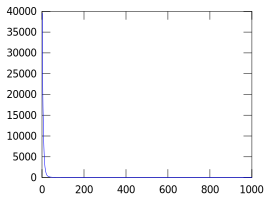

X =

   1.00000   1.22226   1.39076  -0.86603   1.14276
   1.00000  -0.11784  -0.19868   0.86603   0.35465
   1.00000   0.11200  -0.19868   0.86603  -1.22157
   1.00000  -1.21641  -0.99340  -0.86603  -0.27584

y =

   460
   232
   315
   178

theta =

   296.250
    74.610
    66.823
   -31.598
   -41.778



In [4]:
X = [2104 5 1 45;
     1416 3 2 40;
     1534 3 2 30
     852 2 1 36];
y = [460;
     232;
     315;
     178];
X = (X - mean(X)) ./ std(X);  # Feature scaling
X = [ones(4, 1) X];

theta = zeros(size(X, 2),1);
m = length(y);

alpha = 0.1;
num_iters = 1000;
J_h = zeros(num_iters, 1);
for iter=1:num_iters
    theta = theta - alpha / m * X' * (X * theta - y);
    J_h(iter) = sumsq(X * theta - y) / (2 * m);
end

plot(1:numel(J_h), J_h);
X, y, theta

## Gradient Descent in Practice

### Feature Scaling

We can speed up gradient descent by having each of our input values in roughly the same range. This is becouse $\theta$ will descend quickly on small ranges and slowly on lare ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.

The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:

$
-1 \leq x_i \leq 1
$

or

$
-0.5 \leq x_i \leq 0.5
$

There aren't exact requirement; we are only trying to speed things up. The goal is to get all input variables into roughly one of these ranges, give or take a few.

Two techniques to help with this are **feature scaling** and **mean normalization**. 

Feaure scaling involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1.

Mean normalization involves subtracting the average value for the input variable, resulting in a new average value for the input variable of just zero. To implement both of these techniques, adjust you input values as shown in this formula:

$
x_i := \dfrac{x_i - \mu_i}{s_i}
$

Where $\mu_i$ is the **average** of all the values and $s_i$ is the maximum of the range of values *minus* the minimum or $s_i$ is the standard deviation.

**Example:**

<img src="./images/2/Feature_scaling.png" align="left" width=49% />
<img src="./images/2/Mean_normalization.png" align="right" width=49% />

### Learning Rate

It has been proven that if learning rate $\alpha$ is sufficiently small, then $J(\theta)$ will decrease on evey iteration.

We can declare convergence if $J(\theta)$ dereases by less than $E$ in one iteration, where $E$ is some small value such as $10^{-3}$.

Andrew Ng recommends decreasing $\alpha$ by multiples of 3.

$
\cdots, \; 1, \; 0.3, \; 0.1, \; 0.03, \; 0.01, \; \cdots
$

**Example:**

<img src="./images/2/Debugging.png" align=left width=49% />
<img src="./images/2/Not_working.png" align=right width=49% />
<br />
<img src="./images/2/Learning_rate.png" width=70% />

## Features and Polynomial Regression

We can improve our features and the form of our hypothesis function in a couple different ways.

We can **combine** mulitple eatures into one. For example, we can combine $x_1$ and $x_2$ into a new feature $x_3$ by taking $x_1 \cdot x_2$.

### Polynomial Regression

Our hypothesiss function need not be linear (a straight line) if that does not fit the data well.

We can **change the behavior or curve** of our hypothesis function by making it a quadtatic, cubic or square root function (or any other form).

For example, if our hypothesis function is $h_\theta(x) = \theta_0 + \theta_1 x_1$ then we can simply **duplicate** the instances of $x_1$ to get the quadratic function $h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2$ or the cubic function $h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \theta_3 x_1^3$.

In cubic version, we have created new features $x_2$ and $x_3$ where $x_2 = x_1^2$ and $x_3 = x_1^3$.

TO make it a square root function, we could do: $h_\theta(x) =\theta_0 + \theta_1 x_1 + \theta_2 \sqrt{x_1}$

Note that feature scaling is important here, as shown below:

**Example:**

<img src="./images/2/Polynomial_regression.png" width=70% />

## Normal Equation

The "normal equation" is a version of finding the optimum **without iteration**.

The proof for this equation can be found [here](https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29).

$
\theta = (X^T X)^{-1} X^T y
$

There is **no need** to do feature scaling with the normal equation.

**Example:** Normal equation, Pros and cons

<img src="./images/2/Normal_equation.png" align=left width=49% />
<img src = "./images/2/Pros_and_cons.png" align=right width=49% />

With Octave, you can use `pinv` to compute the inverse of the matrix.

However the `pinv` actually compute the [Moore-Penrose pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) of the matrix. So we can just use `pinv(X) * y` instead of `pinv(X'*X) * X' * y)`.
These two are exactly the same thing when $X$ has full column rank.

Another way is just to use `X \ y` (mldivide, i.e. matrix left devide) which roughtly does the same thing with `pinv(X) * y`, but in a different way.

Note that the theta we get here is different from the above, for we didn't use feature scaling here. But we should make roughly the same prediction using these two methods.

In [6]:
X = [2104 5 1 45;
     1416 3 2 40;
     1534 3 2 30
     852 2 1 36];
y = [460;
     232;
     315;
     178];
X = [ones(4, 1) X];
theta = pinv(X) * y

theta =

   188.40032
     0.38663
   -56.13825
   -92.96725
    -3.73782



In [8]:
theta = pinv(X'*X) * X' * y

theta =

   188.40032
     0.38663
   -56.13825
   -92.96725
    -3.73782



In [10]:
theta = X \ y

theta =

   188.40032
     0.38663
   -56.13825
   -92.96725
    -3.73782

